# Testing the Central limit theorem

## Includes

I selected a Fisher distribution for this 

In [1]:
from scipy.stats import f
import numpy
from matplotlib import pyplot

Define the distribution values:

In [2]:
dfn, dfd = 19, 8
value = 1000
fischer = f(dfn, dfd)
mean, var = f.mean(dfn, dfd), f.var(dfn, dfd)
f_range = numpy.linspace(f.ppf(0.001, dfn, dfd), f.ppf(0.99, dfn, dfd), 50)

## Behavior of the selected distribution

Generate a sample with size equal to 'value', build a histogram of it and a graph of Fisher distribution's probability density function:

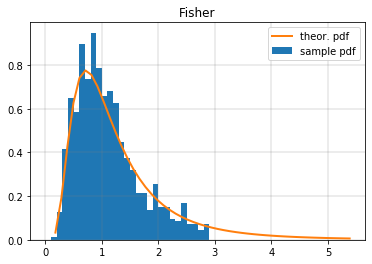

In [3]:
sample = fischer.rvs(value)
pyplot.hist(sample, bins=numpy.arange(0, 3, 0.1), density=True, label='sample pdf')
pdf = fischer.pdf(f_range)
pyplot.plot(f_range, pdf, label='theor. pdf', lw=2)
pyplot.title("Fisher")
pyplot.grid(color='gray', linestyle='-', linewidth=0.3)
pyplot.legend()
pyplot.show()

## Apply the CLT

A function, that generates a sample mean with size equal to value and volume equal to input number:

In [4]:
def sample_mean(n):
    arr = numpy.zeros(value)
    for i in numpy.arange(value):
        sample = fischer.rvs(n)
        for j in sample:
            arr[i] += j
    return arr / n

Some includes:

In [5]:
from scipy.stats import norm
from math import sqrt

A function, that generates the sample mean and buid it's histogram. After, according to the CLT, it draws function of normal distribution with this expectation and variance:

In [9]:
def build_hists(*ls):
    for i in numpy.arange(len(ls)):
        arr = sample_mean(ls[i])
        pyplot.subplot(221+i)
        pyplot.hist(arr, f_range, density=True, label='sample pdf')
        nm = norm(mean, sqrt(var/ls[i]))
        pyplot.plot(f_range, nm.pdf(f_range), label='norm pdf', lw=2)
        pyplot.title("sample mean: " + "$n=%s$" % ls[i])
        pyplot.grid(color='gray', linestyle='-', linewidth=0.3)
        pyplot.legend()
    pyplot.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.30)
    pyplot.show()

Build a sample mean with 3, 10 and 40 volume:

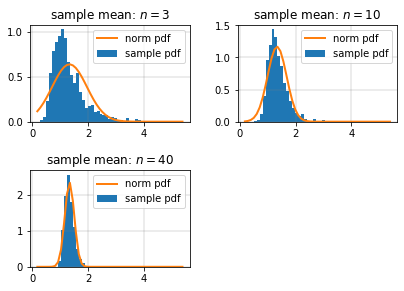

In [7]:
build_hists(3, 10, 40)

Trully, as we can see, how the CLT establishes, when random variables are added, their  normalized sum tends toward a normal distribution. The bigger the volume of the sample, the greater the approximaton